In [90]:
# !pip install tensorflow
# !pip install opencv-python

import tensorflow
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
import pandas as pd
import numpy as np
# !pip install fastai
from fastai.vision.all import *
import matplotlib.pyplot as plt
import sklearn
# !pip install fastai
from fastai.vision.all import *
imgdir = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/images'
imgpath=Path(imgdir)
imgpath.ls()
# truthpath = Path('/Users/halimjun/Library/Mobile Documents/com~apple~CloudDocs/Desktop/omsa/CDA/Report/archive/ShanghaiTech/Part_A/train_data/ground-truth')
truthpath = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/ground-truth'
all_imgs = get_image_files(imgpath)
import scipy.io
import cv2
from scipy.ndimage import gaussian_filter



In [91]:
img_A_train = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/images'
img_B_train = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_B/train_data/images'

img_A_test = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/test_data/images'
img_B_test = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_B/test_data/images'

GT_A_train = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/ground-truth'
GT_B_train = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_B/train_data/ground-truth'

GT_A_test = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/test_data/ground-truth'
GT_B_test = '/Users/hailey/Desktop/archive/ShanghaiTech/Part_B/test_data/ground-truth'


In [92]:
def datalist(dir):
    matfiles=[]
    
    if dir[-6:]=='images':
        print(dir[-6:])
        
        # imgfile = dir + '*.jpg'
        img_list = list(Path(dir).glob( r'*.jpg'))
        # print(imread_collection(imgfile))
        sorted_list=sorted(img_list)
        string_list_final=list(map(lambda x:str(x), sorted_list))
        return string_list_final
    else:
        mat_list = list(Path(dir).glob( r'*.mat'))
        sorted_list=sorted(mat_list)
        string_list_final=list(map(lambda x:str(x), sorted_list))
        return string_list_final

In [93]:
def preprocess(img_A_train,GT_A_train,size):
    
    center_list = []
    heatmap_list=[]
    resized_img_list=[]
    for img_path, GT_path in zip(datalist(img_A_train),datalist(GT_A_train)):

        img = cv2.imread(img_path)
        shape=(img.shape[0],img.shape[1])
        zeros=np.zeros(shape)
        gt=scipy.io.loadmat(GT_path)['image_info'][0][0][0][0][0]
        for x, y in gt:
            x=int(x)
            y=int(y)
            zeros[y,x]=1
        heatmap=gaussian_filter(zeros, sigma =6)
        heatmap_resized=cv2.resize(heatmap, size)
        img_resized=cv2.resize(img, size)
        resized_img_list.append(img_resized)
        center_list.append(zeros)
        heatmap_list.append(heatmap_resized)
    return center_list,heatmap_list, resized_img_list

In [94]:
def saveheatmap(img_A_train,GT_path,size, path):
    
    center_list = []
    heatmap_list=[]
    resized_img_list=[]
    for img_path, GT_path in zip(datalist(img_A_train),datalist(GT_path)):
        # print(img_path)
        # print(GT_path)
        img = cv2.imread(img_path)
        shape=(img.shape[0],img.shape[1])
        zeros=np.zeros(shape)
        gt=scipy.io.loadmat(GT_path)['image_info'][0][0][0][0][0]
        for x, y in gt:
            x=int(x)
            y=int(y)
            zeros[y,x]=1
        heatmap=gaussian_filter(zeros, sigma =6)
        # heatmap_resized=cv2.resize(heatmap, size)
        heatmap_resized=heatmap
        heatmap_resized=heatmap_resized*255
        pm=heatmap_resized.astype(np.uint8)
        
        pm=PILMask.create(pm)
        mask_array = np.array(pm)
        mask_array[mask_array>0]=1
        mask_array[mask_array<=0]=0
        pm_single_class=PILMask.create(mask_array)
        place=img_path.replace('.', "/")
        place=place.replace('_', "/")

        numb=place.split("/")[-2]
        # pm.save(path+"IMG_"+numb+'.png')
        pm_single_class.save(path+"IMG_"+numb+'.png')
        # pm.show()
    # return center_list,heatmap_list, resized_img_list
#/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/heatmap/

In [95]:
saveheatmap(img_A_train,GT_A_train, (180,180), '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/heatmap/')


images
images


In [404]:
saveheatmap(img_A_test,GT_A_test, (180,180), '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/test_data/heatmap/')

images


In [96]:
path = Path("/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/")
# SegmentationDataLoaders.from_label_func(path,bs=8,
# fname = get_image_files(path+'/images'),
# label_func = lambda x: path /'ground-truth'/f'{o.stem}_P{o.suffix}')

In [97]:
# label_func = lambda x: path +'/heatmap/'+f'{x.stem}{x.suffix}'
label_func = lambda x: (path/f'heatmap/'f'{x.stem}.png')
print(all_imgs[37])
print(label_func(all_imgs[37]))


/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/images/IMG_7.jpg
/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/heatmap/IMG_7.png


In [98]:
array=cv2.imread(str(label_func(all_imgs[37])))
np.unique(array)

array([0, 1], dtype=uint8)

In [99]:
nx, ny = 400,400
codes = np.array(["bkg", "person"])
dls = SegmentationDataLoaders.from_label_func(
    path, bs=4, fnames = all_imgs, label_func = label_func, 
    codes = codes, #valid_pct=0.5,
    item_tfms=Resize(nx, ny),
    #item_tfms=RandomCrop(200),
    #batch_tfms=[ OldRandomCrop(10)]
    #batch_tfms=[Rotate(max_deg=359, p=.95), RandomCrop(200)]
    #batch_tfms=Rotate(max_deg=359, p=1)
    batch_tfms=aug_transforms()
)

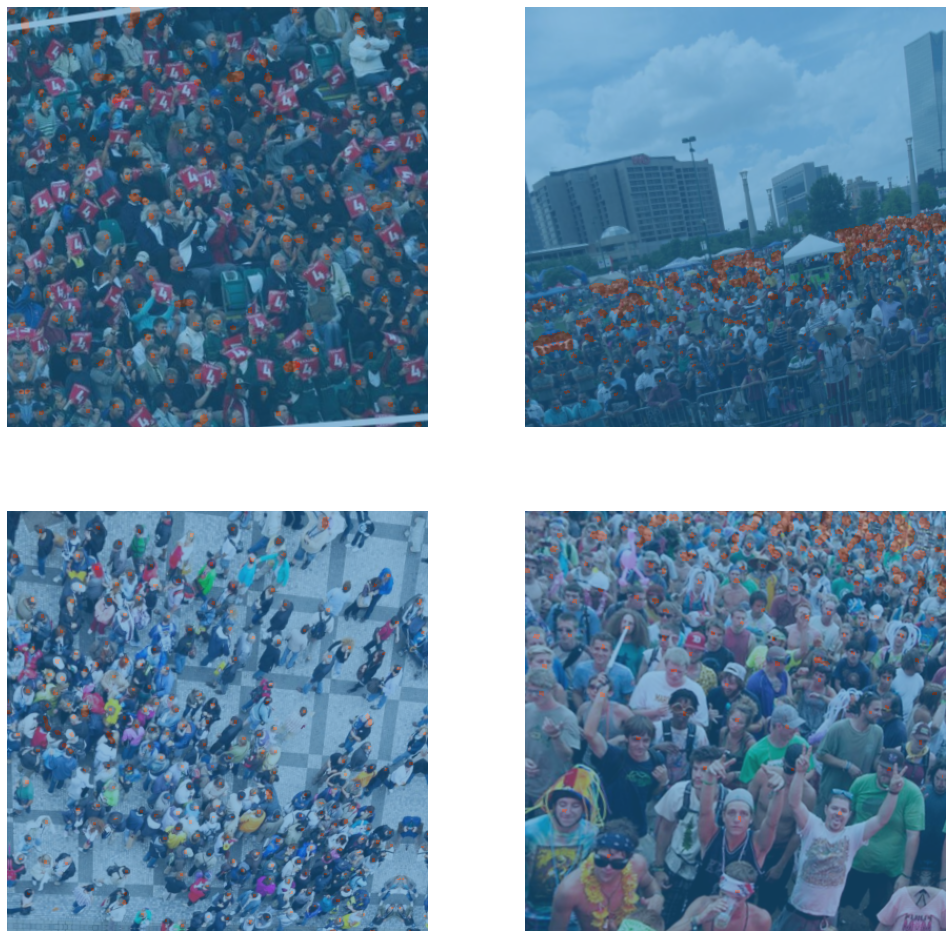

In [100]:
dls.show_batch(figsize=(17,17))

In [102]:
learn = unet_learner(dls, resnet18)
# learn.fit(n_epoch = 10)
learn.fine_tune(20)

epoch,train_loss,valid_loss,time
0,0.328517,0.228056,24:29


epoch,train_loss,valid_loss,time
0,0.269219,0.208690,25:05
1,0.235188,0.196927,25:06
2,0.229755,0.203466,25:06
3,0.244459,0.204352,25:04
4,0.242996,0.218240,25:04
5,0.233884,0.193285,25:05
6,0.222201,0.188572,25:15
7,0.220199,0.204075,25:06
8,0.220757,0.195562,25:06
9,0.211197,0.200781,25:04


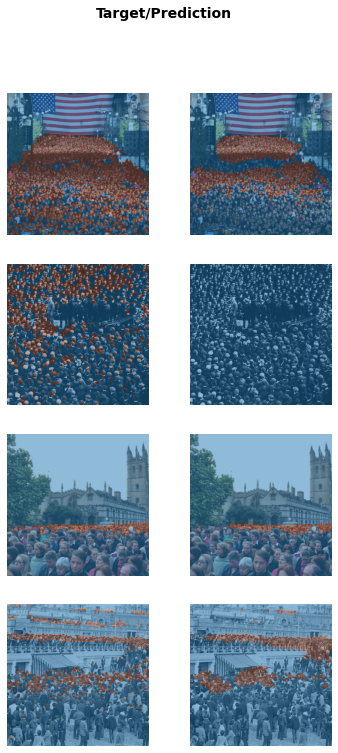

In [317]:
learn.show_results()


In [135]:
model_path = Path('/Users/hailey/Desktop/archive/ShanghaiTech/')
learn.save("trained_model")
#Path('/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/models/trained_model.pth')

Path('/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/train_data/models/trained_model.pth')

In [168]:
def heatmap_get(dir):
    # heatmap_files=[]
    
    img_list = list(Path(dir).glob( r'*.png'))
        # print(imread_collection(imgfile))
    sorted_list=sorted(img_list)
    string_list_final=list(map(lambda x:str(x), sorted_list))
    return string_list_final


In [406]:
heatmap_A_test =  '/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/test_data/heatmap'

In [320]:
predict_on_zero=learn.predict(datalist(img_A_test)[0])

images


In [369]:
heatmap_A_test
# cv2.imread(heatmap_get(heatmap_A_test)[0])
def demask(dir, num:int):
    img=heatmap_get(dir)[num]
    
    mask_img=PILMask.create(img)
    
    # mask_img.show()
    # print(mask_img.shape)
    dots=cv2.imread(img)
    resized_dot=cv2.resize(dots, (400,400))
    return resized_dot
a=demask(heatmap_A_test,0)

In [411]:
#False density
pred_density_list=[]
for i in range(len(datalist(img_A_test))):
    pred_img=learn.predict(datalist(img_A_test)[i])
    val_pred = sum(sum(pred_img[0]>0))/sum(sum(pred_img[0]>=0))
    pred_density_list.append(val_pred)

'/Users/hailey/Desktop/archive/ShanghaiTech/Part_A/test_data/heatmap'

In [414]:
#True density
true_density_list=[]
for img in range(0,182):
    true_img = demask(heatmap_A_test,img)
    val=sum(sum(true_img>0))/sum(sum(true_img>=0))
    true_density_list.append(val[0])


Text(0, 0.5, 'Predicted population density')

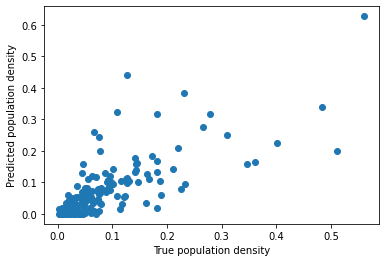

In [417]:
pred_density_array=np.array(pred_density_list)
plt.scatter(true_density_list, pred_density_array)
plt.xlabel('True population density')
plt.ylabel('Predicted population density')
# len(true_density_list)
sklearn.metrics.r2_score(true_density_list, pred_density_array)

In [421]:
# #False density
# pixelwi=[]
# for i in range(len(datalist(img_A_test))):
#     pred_img=learn.predict(datalist(img_A_test)[i])
#     val_pred = sum(sum(pred_img[0]>0))/sum(sum(pred_img[0]>=0))
#     pred_density_list.append(val_pred)
pred_img_=learn.predict(datalist(img_A_test)[1])
pred_img=pred_img_[0]
pred_img

images


In [468]:
print(sklearn.metrics.classification_report(true_class_list[0],pred_class_list[0]))
# pred_class_list[0]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    156798
           1       0.32      0.71      0.44      3202

    accuracy                           0.96    160000
   macro avg       0.66      0.84      0.71    160000
weighted avg       0.98      0.96      0.97    160000



In [458]:
true_class_list=[]
pred_class_list=[]
for i in range(0,182):
    true_img = demask(heatmap_A_test,i)
    pred_img_=learn.predict(datalist(img_A_test)[i])
    pred_img=pred_img_[0]
    true_class=true_img[:,:,0].ravel()
    pred_class=np.array(pred_img).ravel()
    # se=sumsum(np.abs(dff))/(400*400)
    true_class_list.append(list(true_class))
    pred_class_list.append(list(pred_class))
    
    

images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


images


In [ ]:
#True density
true_density_list=[]
for img in range(0,182):
    true_img = demask(heatmap_A_test,img)
    val=sum(sum(true_img>0))/sum(sum(true_img>=0))
    true_density_list.append(val[0])


images


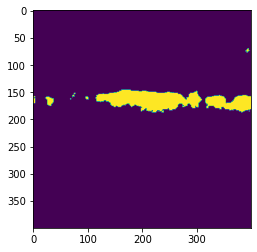

In [216]:
pred=learn.predict(datalist(img_A_test)[0])
plt.imshow(pred[1])

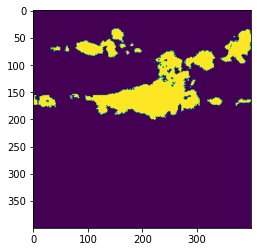

In [86]:
plt.imshow(pred[0])

In [ ]:
#True density
true_density_list=[]
for img in range(len(heatmap_A_test)):
    true_img = demask(heatmap_A_test,img)
    val=sum(sum(true_img>0))/sum(sum(true_img>=0))
    true_density_list.append(val[0])
#predicting density
pred_density_list=[]
for i in range(len(datalist(img_A_test))):
    pred_img=learn.predict(datalist(img_A_test)[i])
    val_pred = sum(sum(pred_img[0]>0))/sum(sum(pred_img[0]>=0))
    pred_density_list.append(val_pred)

In [496]:
img_crawl='/Users/hailey/Desktop/surv1.png'
img_crawl_=cv2.imread(img_crawl)
img_c_resize=cv2.resize(img_crawl_, (400,400))

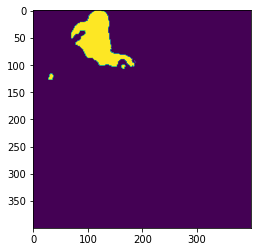

In [497]:
plt.imshow(learn.predict(img_c_resize)[1])

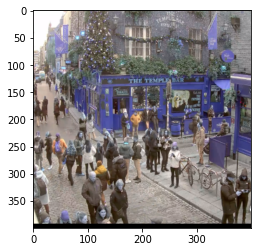

In [498]:
plt.imshow(img_c_resize)